<a id = 'gather'></a>
> ## A. Data Gathering

In [ ]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import seaborn as sns

%matplotlib inline

In [ ]:
# Mounting the Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extracting the Dataset

with zipfile.ZipFile('/content/drive/MyDrive/lending-club.zip','r') as myzip:
    myzip.extractall('Dataset')

In [ ]:
# Importing Dataset

ln_df = pd.read_csv("/content/Dataset/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<a id = 'assess'></a>
> ## B. Data Assessing

In [ ]:
# About Dataset

ln_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [ ]:
# Dataset Shape

var = ln_df.shape

print('In the Dataset : \tNo of Rows : {}\n\
                        No of Columns : {}'\
                        .format(var[0],var[1]))

In the Dataset : 	No of Rows : 2260701
                        No of Columns : 151


In [ ]:
# About Dataset

ln_df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,...,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,...,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,669.755603,673.755631,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,3.301124e+01,8.859632e-01,2.190047e+01,26.464094,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.343239e+03,7.342333e+03,9.901383e+03,9.896992e+03,8.321852e+03,2.679738e+03,1.184159e+01,7.481640e+02,1.312256e+02,6.018248e+03,7.297044e+01,1.110976e+02,1.508131e-01,21.533121,0.0,7.416135e+04,7.822086,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,...,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+0

In [ ]:
# Dataset Sample

pd.set_option('display.max_columns', None)
ln_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
# Column Description

df_col_desc = pd.read_csv('/content/drive/My Drive/Column Desc.csv').drop('Sr.No',axis = 1)
df_col_desc.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


In [ ]:
# Datatypes of Columns

ln_df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

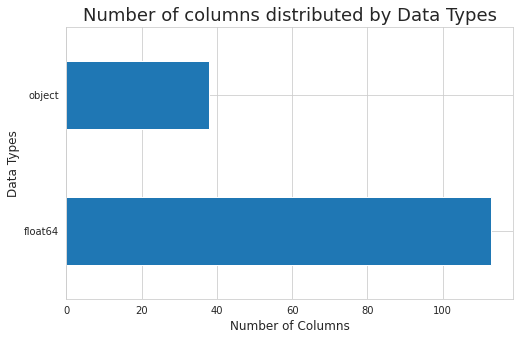

In [ ]:
ln_df.dtypes.value_counts().plot(kind = 'barh',figsize = (8,5))
plt.title('Number of columns distributed by Data Types',fontsize=18)
plt.xlabel('Number of Columns',size = 12)
plt.ylabel('Data Types',size = 12);

In [ ]:
# Checking for Duplicate Values

ln_df.duplicated().sum()

0

In [ ]:
# Checking for Any Null Values in Dataset

ln_df.isnull().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

Well we've found a lot of `Null Values`!!

In [ ]:
# Function to find % of Null values present in an Attribute

def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics

miss_values = null_values(ln_df)
miss_values.head(50)

Dataframe has 151 columns.
There are 150 columns that have missing values.


,Missing Values,% of Total Values
member_id,2260701,100.0
orig_projected_additional_accrued_interest,2252050,99.6
hardship_dpd,2249784,99.5
hardship_status,2249784,99.5
deferral_term,2249784,99.5
hardship_amount,2249784,99.5
hardship_start_date,2249784,99.5
hardship_end_date,2249784,99.5
payment_plan_start_date,2249784,99.5
hardship_length,2249784,99.5


As aspected we've found a lot of **Null** Values,\
So,we need `Select` only required columns and `Drop` all the Unnecessary columns. 

In [ ]:
# Unique values in home_ownership

ln_df['home_ownership'].value_counts()

MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: home_ownership, dtype: int64

In [ ]:
# Unique values in loan_status

ln_df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [ ]:
ln_df['loan_status'][ln_df['application_type'] == 'Individual'].value_counts()

Fully Paid                                             1057295
Current                                                 787191
Charged Off                                             262215
Late (31-120 days)                                       19289
In Grace Period                                           7342
Late (16-30 days)                                         3843
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     34
Name: loan_status, dtype: int64

In [ ]:
ln_df['loan_status'][ln_df['application_type'] == 'Joint App'].value_counts()

Current               91126
Fully Paid            19456
Charged Off            6344
Late (31-120 days)     2178
In Grace Period        1094
Late (16-30 days)       506
Default                   6
Name: loan_status, dtype: int64

In [ ]:
# Unique Values in emp_length

ln_df['emp_length'].value_counts()

10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64

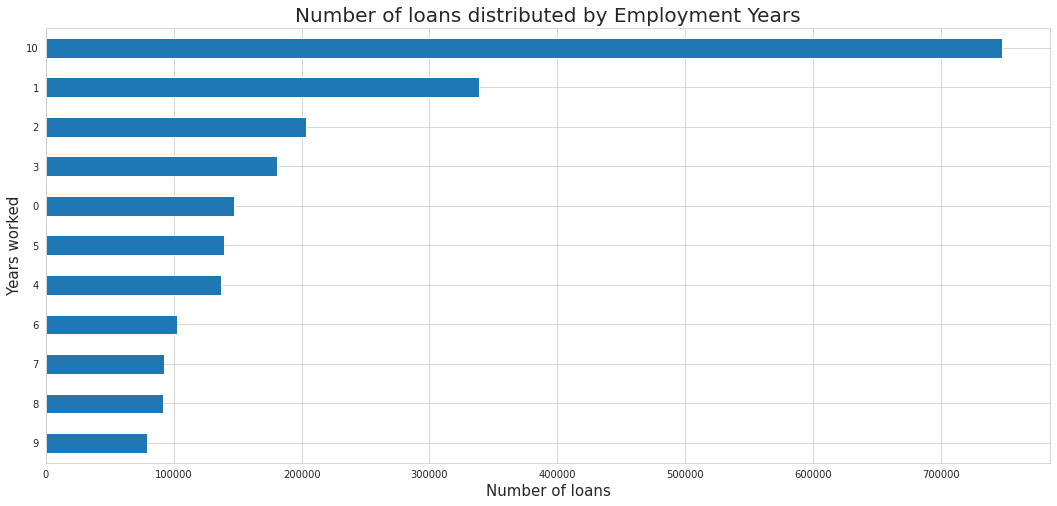

In [ ]:
ln_df['emp_length'].fillna(value=0,inplace=True)

ln_df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

ln_df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

In [ ]:
# Unique Values in purpose

ln_df['purpose'].value_counts()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

In [ ]:
# Value counts in pub_rec_bankruptcies

ln_df.pub_rec_bankruptcies.value_counts()

0.0     1987383
1.0      258444
2.0       10518
3.0        2131
4.0         541
5.0         188
6.0          60
7.0          23
8.0          10
9.0           3
12.0          1
11.0          1
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
# Value counts in pub_rec

ln_df.pub_rec.value_counts()

0.0     1902758
1.0      305390
2.0       34154
3.0       10567
4.0        3872
5.0        1843
6.0         933
7.0         427
8.0         243
9.0         143
10.0         91
11.0         58
12.0         35
13.0         30
14.0         12
15.0         11
16.0         11
19.0          9
21.0          6
18.0          6
17.0          5
24.0          4
28.0          4
22.0          3
20.0          3
23.0          2
49.0          2
61.0          2
44.0          1
54.0          1
52.0          1
47.0          1
46.0          1
45.0          1
37.0          1
40.0          1
34.0          1
32.0          1
31.0          1
26.0          1
25.0          1
86.0          1
63.0          1
Name: pub_rec, dtype: int64

In [ ]:
# Value counts in Verification Status

ln_df.verification_status.value_counts()

Source Verified    886231
Not Verified       744806
Verified           629631
Name: verification_status, dtype: int64

In [ ]:
# Value counts in Verification Status Joint

ln_df.verification_status_joint.value_counts()

Not Verified       57403
Source Verified    34827
Verified           23500
Name: verification_status_joint, dtype: int64

In [ ]:
# Columns Needed to Change Dtypes (Object-to-integer/datetime)

pd.set_option('display.max_columns', None)
ln_df.select_dtypes(include = 'object',exclude = 'float64').head(5)

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
0,68407277,36 months,C,C4,leadman,10,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,Aug-2003,w,Jan-2019,NaN,Mar-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
1,68355089,36 months,C,C1,Engineer,10,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,Dec-1999,w,Jun-2016,NaN,Mar-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2,68341763,60 months,B,B4,truck driver,10,MORTGAGE,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,Aug-2000,w,Jun-2017,NaN,Mar-2019,Joint App,Not Verified,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
3,66310712,60 months,C,C5,Information Systems Officer,10,MORTGAGE,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,Sep-2008,w,Feb-2019,Apr-2019,Mar-2019,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
4,68476807,60 months,F,F1,Contract Specialist,3,MORTGAGE,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,Jun-1998,w,Jul-2016,NaN,Mar-2018,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN


In [ ]:
# Columns Needed to Change Dtypes (float-to-object/int) 

pd.set_option('display.max_columns', None)
ln_df.select_dtypes(include = 'float64',exclude = 'object').head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
0,NaN,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,30.0,1.0,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,NaN,1.0,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,NaN,1.0,71000.0,13.85,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,679.0,675.0,0.0,NaN,1.0,NaN,NaN,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10

> ## C. Data Cleaning

## **Assessment Report : Individual**

- We need to select rows with `application_type` as **Individual** only.

- From the above assessment, we've concluded that only 20 columns are required for Prediction.

- Droping all the Row(s) which has less than 5 missing attribute values. 

- Replacing all the Null Values from respective columns:
  1. `pub_rec_bankruptcies`
  2. `mort_acc`
  3. `revol_util`
  4. `emp_length`

- Replace Special Characters & Words
1. `emp_length`
2.  `term`

- Changes Needed: (object-to-int)
1. `term`
2. `emp_length`

- Changes Needed (float64-to-int)
1. `fico_range_low`
2. `fico_range_high`
3. `open_acc`
4. `total_acc`
5. `mort_acc`

- New Columns (in Scalling)
1. `bal_annual_inc` = (`loan_amnt` / `annual_inc`)
2. `inst_anmt_ratio` = (`installment` / `loan_amt`)
3. `credit_line_ratio` = (`open_acc` / `total_acc`)
4. `fico_range_avg` = (`fico_range_high` + `fico_range_low`) / 2

- Dropping Columns
1. `loan_amnt`
2. `installment`
3. `open_acc`
4. `total_acc`
5. `fico_range_low`
6. `fico_range_high`

- Renaming the columns:
1. `term`
2. `fico_range_avg`

<a id = 'indi'></a>
>> ### I. Individual Account

In [ ]:
# Making a copy of dataset

inv_df_clean = ln_df.copy()

In [ ]:
# Selecting Rows for Individual Accounts

inv_df_clean = inv_df_clean[inv_df_clean.application_type == 'Individual']

In [ ]:
# Required Attributes

n = ['loan_amnt',
     'term',
     'int_rate',
     'grade',
     'sub_grade',
     'emp_length',
     'home_ownership',
     'annual_inc',
     'verification_status',
     'loan_status',
     'dti',
     'pub_rec',
     'pub_rec_bankruptcies',
     'revol_bal',
     'revol_util',
     'fico_range_low',
     'fico_range_high',
     'open_acc',
     'total_acc',
     'mort_acc',
     'credit_hist',
     'installment']

In [ ]:
# Inserting all the columns in a list

col = list(inv_df_clean.columns) # 151 Columns

# Dropping all the un-necessary columns

for i in col:
  if i not in n:
    inv_df_clean.drop(i,axis = 1,inplace = True)

In [ ]:
# Checking for Null Values

inv_df_clean.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length              130357
home_ownership               0
annual_inc                   4
verification_status          0
loan_status                  0
dti                          0
fico_range_low               0
fico_range_high              0
open_acc                    29
pub_rec                     29
revol_bal                    0
revol_util                1552
total_acc                   29
mort_acc                 50030
pub_rec_bankruptcies      1365
dtype: int64

Columns with more **null** values needs to be filled using appropriate techniques like (i.e mean,meadian,mode).

In [ ]:
# Removing the Special Charaters
inv_df_clean['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

# Replacing Null Values
inv_df_clean['revol_util'].fillna(inv_df_clean['revol_util'].mean(), inplace = True)
inv_df_clean['mort_acc'].fillna(0, inplace = True)
inv_df_clean['open_acc'].fillna(0, inplace = True)
inv_df_clean['total_acc'].fillna(0, inplace = True)
inv_df_clean['pub_rec'].fillna(0, inplace = True)
inv_df_clean['pub_rec_bankruptcies'].fillna(0, inplace = True)
inv_df_clean['emp_length'].fillna(np.random.randint(6,11),inplace = True)

# Dropping the Null Value
inv_df_clean.dropna(axis = 0,subset = ['annual_inc'],inplace = True)


In [ ]:
# Confirmation

inv_df_clean.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
dti                     0
fico_range_low          0
fico_range_high         0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [ ]:
# Data_type: Int

inv_df_clean['emp_length'] = inv_df_clean['emp_length'].astype('int64')

inv_df_clean['fico_range_low'] = inv_df_clean['fico_range_low'].astype('int64')
inv_df_clean['fico_range_high'] = inv_df_clean['fico_range_high'].astype('int64')
inv_df_clean['open_acc'] = inv_df_clean['open_acc'].astype('int64')
inv_df_clean['total_acc'] = inv_df_clean['total_acc'].astype('int64')
inv_df_clean['pub_rec'] = inv_df_clean['pub_rec'].astype('int64')
inv_df_clean['pub_rec_bankruptcies'] = inv_df_clean['pub_rec_bankruptcies'].astype('int64')
inv_df_clean['mort_acc'] = inv_df_clean['mort_acc'].astype('int64')


In [ ]:
# Converting USD into INR

## Importing .csv file
df_inr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Exchange rate history of the Indian rupee - Wikipedia.csv")

## Getting Values from .xlsx file
def Average(lst): 
    return sum(lst) / len(lst)

l = []
for i in range (2007,2019):
  n = df_inr.USD[df_inr.Year == i].values
  l.append(n)


## Multiplying with average value

inv_df_clean['loan_amnt'] = inv_df_clean['loan_amnt'] * Average(l)
inv_df_clean['annual_inc'] = inv_df_clean['annual_inc'] * Average(l)
inv_df_clean['installment'] = inv_df_clean['installment'] * Average(l)
inv_df_clean['revol_bal'] = inv_df_clean['revol_bal'] * Average(l)

In [ ]:
# Target Column

inv_df_clean['loan_status'] = np.where(inv_df_clean["loan_status"].str.contains("Fully"), 'Yes', 'No')

# Rounding Off

inv_df_clean['loan_amnt'] = inv_df_clean['loan_amnt'].round(2)
inv_df_clean['installment'] = inv_df_clean['installment'].round(2)
inv_df_clean['annual_inc'] = inv_df_clean['annual_inc'].round(2)
inv_df_clean['revol_bal'] = inv_df_clean['revol_bal'].round(2)

# Replacing with Mean

inv_df_clean['fico_range_avg'] = (inv_df_clean['fico_range_high'] + inv_df_clean['fico_range_low'])//2
inv_df_clean.drop(['fico_range_high','fico_range_low'],axis = 1,inplace = True)

# Renaming the Columns

inv_df_clean.rename(columns = {'fico_range_avg':'cibil_score'},inplace = True)

# Index Reset

inv_df_clean.reset_index(inplace = True, drop = True) 

In [ ]:
pd.set_option('display.max_columns', None)
inv_df_clean.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,cibil_score
0,202253.94,36 months,13.99,6912.03,C,C4,10,MORTGAGE,3089990.75,Not Verified,Yes,5.91,7,0,155342.26,29.7,13,1,0,677
1,1387686.76,36 months,11.99,46084.68,C,C1,10,MORTGAGE,3651807.25,Not Verified,Yes,16.06,22,0,1206220.03,19.2,38,4,0,717
2,1966357.75,60 months,14.85,46625.15,C,C5,10,MORTGAGE,6179981.50,Source Verified,No,17.06,13,0,438329.23,11.6,17,1,0,787
3,584289.16,60 months,22.45,16287.62,F,F1,3,MORTGAGE,5867218.25,Source Verified,Yes,25.37,12,0,1232007.40,64.5,35,6,0,697
4,671370.72,36 months,13.44,22763.68,C,C3,4,RENT,1910176.10,Source Verified,Yes,10.20,5,0,495634.52,68.4,6,0,0,692
5,1123633.00,36 months,9.17,35820.30,B,B2,10,MORTGAGE,10112697.00,Not Verified,Yes,14.67,12,0,4906287.31,84.5,27,4,0,682
6,1123633.00,36 months,8.49,35465.23,B,B1,10,MORTGAGE,4775440.25,Not Verified,Yes,17.61,8,0,46406.04,5.7,15,3,0,707
7,561816.50,36 months,6.49,17216.87,A,A2,6,RENT,4775440.25,Not Verified,Yes,13.07,14,1,587884.79,34.5,23,1,1,687
8,449453.20,36 months,11.48,14817.35,B,B5,10,MORTGAGE,2359629.30,Not Verified,Yes,34.80,8,0,395181.73,39.1,18,1,0,702
9,1258468.96,60 months,12.88,28557.13,C,C2,6,MORTGAGE,5337256.75,Not Verified,No,22.98,16,0,731934.54,32.7,35,5,0,712


In [ ]:
inv_df_clean.to_csv('/content/drive/MyDrive/Colab Notebooks/Individual_clean_visual.csv',index = False)

## **Assessment Report : Joint**

- We need to select rows with `application_type` as **Joint App** only.

- From the above assessment, we've concluded that only 47 columns are required for Prediction.

- Replacing all the Null Values from respective columns:
  1. `revol_bal_joint`
  2. `sec_app_num_rev_accts`
  3. `revol_util`
  4. `emp_length`
  5. `dti_joint`
  6. `verification_status_joint`
  7. `dti`
  8. `open_acc_6m`
  9. `open_act_il`
  10. `open_il_12m`
  11. `open_il_24m`
  12. `mths_since_rcnt_il`
  13. `total_bal_il`
  14. `il_util`
  15. `open_rv_12m`
  16. `open_rv_24m`
  17. `max_bal_bc`
  18. `all_util`
  19. `inq_fi`
  20. `total_cu_tl`
  21. `inq_last_12m`
  22. `sec_app_inq_last_6mths`
  23. `sec_app_mort_acc`
  24. `sec_app_open_acc`
  25. `sec_app_revol_util`
  26. `sec_app_open_act_il`

- Dropping Null Row with columns as:
1. `sec_app_fico_range_low`
2. `sec_app_fico_range_high`

- Replace Special Characters & Words
1. `emp_length`
2.  `term`

- Changes Needed: (object-to-int)
1. `term`
2. `emp_length`

- Changes Needed (float64-to-int)
1. `fico_range_low`
2. `fico_range_high`
3. `open_acc`
4. `total_acc`
5. `mort_acc`
6. `open_acc_6m`
7. `open_act_il`
8. `open_il_12m`
9. `open_il_24m`
10. `mths_since_rcnt_il`
11. `open_rv_12m`
12. `open_rv_24m`
13. `inq_fi`
14. `total_cu_tl`
15. `inq_last_12m`
16. `pub_rec_bankruptcies`
17. `sec_app_inq_last_6mths`
18. `sec_app_fico_range_low`
19. `sec_app_fico_range_high`
20. `sec_app_mort_acc`
21. `sec_app_open_acc`
22. `sec_app_open_act_il`
23. `sec_app_num_rev_accts`


- New Columns (in Scalling)
1. `bal_annual_inc` = (`loan_amnt` / `annual_inc`)
2. `inst_anmt_ratio` = (`installment` / `loan_amt`)
3. `credit_line_ratio` = (`open_acc` / `total_acc`)
4. `fico_range_avg` = (`fico_range_high` + `fico_range_low`) // 2
5. `sec_balance_annual_inc` = (`loan_amnt` / `annual_inc_joint`)
6. `sec_app_fico_range_avg` = (`sec_app_fico_range_high` + `sec_app_fico_range_low`) // 2


- Dropping Columns`
1. `fico_range_low`
2. `fico_range_high`
3. `sec_app_fico_range_low`
4. `sec_app_fico_range_high`

- Renaming the columns:
1. `term`
2. `fico_range_avg`
3. `sec_app_fico_range_avg`

<a id = 'joint'></a>
>> ### II. Joint Account

In [ ]:
# Making a copy of dataset

joint_df_clean = ln_df.copy()

In [ ]:
# Selecting Rows for Individual Accounts

joint_df_clean = joint_df_clean[joint_df_clean.application_type == 'Joint App']

In [ ]:
n = ['term','int_rate','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','loan_status','dti',
     'pub_rec','revol_bal','revol_util','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_act_il',
     'open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi',
     'total_cu_tl','inq_last_12m','mort_acc','pub_rec_bankruptcies','revol_bal_joint','sec_app_inq_last_6mths','sec_app_mort_acc',
     'sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts','fico_range_low','fico_range_high',
     'sec_app_fico_range_high','sec_app_fico_range_low','installment','loan_amnt','open_acc','total_acc']

In [ ]:
# Inserting all the columns in a list

col = list(joint_df_clean.columns) # 151 Columns

# Dropping all the un-necessary columns

for i in col:
  if i not in n:
    joint_df_clean.drop(i,axis = 1,inplace = True)

In [ ]:
pd.set_option('display.max_columns', None)
joint_df_clean.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mort_acc,pub_rec_bankruptcies,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.00,Not Verified,Fully Paid,10.78,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,71000.00,13.85,Not Verified,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,2.0,5.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,20000.0,60 months,13.44,459.58,C,C3,9 years,MORTGAGE,75000.00,Not Verified,Current,20.67,715.0,719.0,16.0,0.0,18818.0,48.8,54.0,100000.00,16.40,Not Verified,2.0,3.0,1.0,1.0,10.0,99376.0,67.0,3.0,4.0,6713.0,59.0,1.0,7.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,15000.0,36 months,11.99,498.15,C,C1,1 year,MORTGAGE,65000.00,Source Verified,Fully Paid,17.56,665.0,669.0,9.0,0.0,13028.0,88.3,16.0,77000.00,15.40,Not Verified,0.0,0.0,0.0,0.0,30.0,22525.0,74.0,0.0,2.0,2839.0,78.0,3.0,1.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,24000.0,60 months,23.13,678.37,F,F2,6 years,MORTGAGE,43435.00,Verified,Fully Paid,35.70,680.0,684.0,13.0,1.0,12508.0,73.1,22.0,113314.00,25.44,Not Verified,0.0,6.0,2.0,5.0,10.0,48582.0,75.0,0.0,1.0,5690.0,74.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,24000.0,60 months,13.44,551.50,C,C3,1 year,MORTGAGE,96000.00,Verified,Fully Paid,22.70,675.0,679.0,13.0,1.0,19403.0,53.3,24.0,117000.00,22.76,Not Verified,0.0,4.0,1.0,3.0,10.0,43145.0,70.0,1.0,3.0,6210.0,64.0,2.0,0.0,5.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
664,8750.0,36 months,18.99,320.70,E,E1,1 year,RENT,29524.32,Verified,Charged Off,46.71,680.0,684.0,9.0,1.0,2412.0,96.5,12.0,94348.32,17.07,Not Verified,2.0,6.0,2.0,3.0,3.0,92313.0,89.0,0.0,1.0,1458.0,89.0,4.0,0.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,15000.0,36 months,14.85,518.88,C,C5,NaN,MORTGAGE,37534.44,Verified,Fully Paid,31.44,680.0,684.0,13.0,0.0,39981.0,45.0,28.0,61366.44,19.22,Not Verified,1.0,0.0,0.0,0.0,29.0,0.0,NaN,3.0,7.0,6579.0,45.0,2.0,0.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,35000.0,60 months,17.97,888.20,D,D4,10+ years,MORTGAGE,150000.00,Not Verified,Fully Paid,25.11,670.0,674.0,27.0,0.0,39913.0,85.3,45.0,192000.00,25.28,Not Verified,2.0,5.0,2.0,2.0,11.0,139765.0,74.0,3.0,3.0,13130.0,78.0,3.0,8.0,13.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1189,17025.0,60 months,17.97,432.05,D,D4,10+ years,MORTGAGE,38000.00,Verified,Current,23.86,675.0,679.0,9.0,0.0,15204.0,74.2,22.0,49748.00,21.76,Not Verified,1.0,2.0,0.0,3.0,19.0,10781.0,73.0,2.0,3.0,2968.0,74.0,1.0,2.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1491,8000.0,36 months,11.99,265.68,C,C1,7 years,MORTGAGE,57000.00,Not Verified,Fully Paid,16.76,665.0,669.0,9.0,0.0,12875.0,54.3,14.0,72000.00,14.63,Not Verified,1.0,1.0,0.0,1.0,17.0,22697.0,80.0,2.0,3.0,3720.0,68.0,3.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking for Null Values

joint_df_clean.isnull().sum()

loan_amnt                        0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                   16550
home_ownership                   0
annual_inc                       0
verification_status              0
loan_status                      0
dti                           1711
fico_range_low                   0
fico_range_high                  0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                     250
total_acc                        0
annual_inc_joint                 0
dti_joint                        4
verification_status_joint     4980
open_acc_6m                    348
open_act_il                    348
open_il_12m                    348
open_il_24m                    348
mths_since_rcnt_il            4534
total_bal_il                   348
il_util             

In [ ]:
# Removing the Special Charaters
joint_df_clean['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

# Replacing Null Values
joint_df_clean['emp_length'].fillna(np.random.randint(6,11),inplace = True)
joint_df_clean['dti'].fillna(joint_df_clean['dti'].mean(), inplace = True)
joint_df_clean['revol_util'].fillna(joint_df_clean['revol_util'].mean(), inplace = True)
joint_df_clean['dti_joint'].fillna(joint_df_clean['dti_joint'].mean(), inplace = True)
joint_df_clean['verification_status_joint'].fillna('Not Verified', inplace = True)
joint_df_clean['open_acc_6m'].fillna(0, inplace = True)
joint_df_clean['open_act_il'].fillna(0, inplace = True)
joint_df_clean['open_il_12m'].fillna(0, inplace = True)
joint_df_clean['open_il_24m'].fillna(0, inplace = True)
joint_df_clean['mths_since_rcnt_il'].fillna(0, inplace = True)
joint_df_clean['total_bal_il'].fillna(0, inplace = True)
joint_df_clean['il_util'].fillna(joint_df_clean['il_util'].mean(), inplace = True)
joint_df_clean['open_rv_12m'].fillna(0, inplace = True)
joint_df_clean['open_rv_24m'].fillna(0, inplace = True)
joint_df_clean['max_bal_bc'].fillna(0, inplace = True)
joint_df_clean['all_util'].fillna(joint_df_clean['all_util'].mean(), inplace = True)
joint_df_clean['inq_fi'].fillna(0, inplace = True)
joint_df_clean['total_cu_tl'].fillna(0, inplace = True)
joint_df_clean['inq_last_12m'].fillna(0, inplace = True)
joint_df_clean['revol_bal_joint'].fillna(0, inplace = True)
joint_df_clean['sec_app_inq_last_6mths'].fillna(0, inplace = True)
joint_df_clean['sec_app_mort_acc'].fillna(0, inplace = True)
joint_df_clean['sec_app_open_acc'].fillna(0, inplace = True)
joint_df_clean['sec_app_revol_util'].fillna(0, inplace = True)
joint_df_clean['sec_app_open_act_il'].fillna(0, inplace = True)
joint_df_clean['sec_app_num_rev_accts'].fillna(0, inplace = True)


# Dropping Null Rows
joint_df_clean.dropna(subset = ['sec_app_fico_range_low'],how = 'all',inplace = True)
joint_df_clean.dropna(subset = ['sec_app_fico_range_high'],how = 'all',inplace = True)

In [ ]:
# Confirmation

joint_df_clean.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
loan_status                  0
dti                          0
fico_range_low               0
fico_range_high              0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
annual_inc_joint             0
dti_joint                    0
verification_status_joint    0
open_acc_6m                  0
open_act_il                  0
open_il_12m                  0
open_il_24m                  0
mths_since_rcnt_il           0
total_bal_il                 0
il_util                      0
open_rv_12m                  0
open_rv_24m                  0
max_bal_bc                   0
all_util

In [ ]:
# DataTypes of Columns

joint_df_clean.dtypes

loan_amnt                    float64
term                          object
int_rate                     float64
installment                  float64
grade                         object
sub_grade                     object
emp_length                    object
home_ownership                object
annual_inc                   float64
verification_status           object
loan_status                   object
dti                          float64
fico_range_low               float64
fico_range_high              float64
open_acc                     float64
pub_rec                      float64
revol_bal                    float64
revol_util                   float64
total_acc                    float64
annual_inc_joint             float64
dti_joint                    float64
verification_status_joint     object
open_acc_6m                  float64
open_act_il                  float64
open_il_12m                  float64
open_il_24m                  float64
mths_since_rcnt_il           float64
t

In [ ]:
# Changing Dtype to int64

joint_df_clean['emp_length'] = joint_df_clean['emp_length'].astype('int64')

joint_df_clean['fico_range_low'] = joint_df_clean['fico_range_low'].astype('int64')
joint_df_clean['fico_range_high'] = joint_df_clean['fico_range_high'].astype('int64')
joint_df_clean['open_acc'] = joint_df_clean['open_acc'].astype('int64')
joint_df_clean['total_acc'] = joint_df_clean['total_acc'].astype('int64')
joint_df_clean['pub_rec'] = joint_df_clean['pub_rec'].astype('int64')
joint_df_clean['open_acc_6m'] = joint_df_clean['open_acc_6m'].astype('int64')
joint_df_clean['open_act_il'] = joint_df_clean['open_act_il'].astype('int64')
joint_df_clean['open_il_12m'] = joint_df_clean['open_il_12m'].astype('int64')
joint_df_clean['open_il_24m'] = joint_df_clean['open_il_24m'].astype('int64')
joint_df_clean['mths_since_rcnt_il'] = joint_df_clean['mths_since_rcnt_il'].astype('int64')
joint_df_clean['open_rv_12m'] = joint_df_clean['open_rv_12m'].astype('int64')
joint_df_clean['open_rv_24m'] = joint_df_clean['open_rv_24m'].astype('int64')
joint_df_clean['inq_fi'] = joint_df_clean['inq_fi'].astype('int64')
joint_df_clean['total_cu_tl'] = joint_df_clean['total_cu_tl'].astype('int64')
joint_df_clean['inq_last_12m'] = joint_df_clean['inq_last_12m'].astype('int64')
joint_df_clean['pub_rec_bankruptcies'] = joint_df_clean['pub_rec_bankruptcies'].astype('int64')
joint_df_clean['sec_app_fico_range_low'] = joint_df_clean['sec_app_fico_range_low'].astype('int64')
joint_df_clean['sec_app_fico_range_high'] = joint_df_clean['sec_app_fico_range_high'].astype('int64')
joint_df_clean['sec_app_inq_last_6mths'] = joint_df_clean['sec_app_inq_last_6mths'].astype('int64')
joint_df_clean['sec_app_mort_acc'] = joint_df_clean['sec_app_mort_acc'].astype('int64')
joint_df_clean['sec_app_open_acc'] = joint_df_clean['sec_app_open_acc'].astype('int64')
joint_df_clean['sec_app_open_act_il'] = joint_df_clean['sec_app_open_act_il'].astype('int64')
joint_df_clean['sec_app_num_rev_accts'] = joint_df_clean['sec_app_num_rev_accts'].astype('int64')

In [ ]:
# Converting USD into INR

## Importing .csv file
df_inr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Exchange rate history of the Indian rupee - Wikipedia.csv")

## Getting Values from .xlsx file
def Average(lst): 
    return sum(lst) / len(lst)

l = []
for i in range (2007,2019):
  n = df_inr.USD[df_inr.Year == i].values
  l.append(n)


## Multiplying with average value

joint_df_clean['loan_amnt'] = joint_df_clean['loan_amnt'] * Average(l)
joint_df_clean['annual_inc'] = joint_df_clean['annual_inc'] * Average(l)
joint_df_clean['installment'] = joint_df_clean['installment'] * Average(l)
joint_df_clean['revol_bal'] = joint_df_clean['revol_bal'] * Average(l)
joint_df_clean['annual_inc_joint'] = joint_df_clean['annual_inc_joint'] * Average(l)
joint_df_clean['total_bal_il'] = joint_df_clean['total_bal_il'] * Average(l)
joint_df_clean['max_bal_bc'] = joint_df_clean['max_bal_bc'] * Average(l)
joint_df_clean['revol_bal_joint'] = joint_df_clean['revol_bal_joint'] * Average(l)

In [ ]:
# Target Column

joint_df_clean['loan_status'] = np.where(joint_df_clean["loan_status"].str.contains("Fully"), 'Yes', 'No')

# Rounding Off

joint_df_clean['loan_amnt'] = joint_df_clean['loan_amnt'].round(2)
joint_df_clean['installment'] = joint_df_clean['installment'].round(2)
joint_df_clean['annual_inc'] = joint_df_clean['annual_inc'].round(2)
joint_df_clean['revol_bal'] = joint_df_clean['revol_bal'].round(2)
joint_df_clean['annual_inc_joint'] = joint_df_clean['annual_inc_joint'].round(2)
joint_df_clean['total_bal_il'] = joint_df_clean['total_bal_il'].round(2)
joint_df_clean['max_bal_bc'] = joint_df_clean['max_bal_bc'].round(2)
joint_df_clean['revol_bal_joint'] = joint_df_clean['revol_bal_joint'].round(2)

# Replacing with Mean

joint_df_clean['fico_range_avg'] = (joint_df_clean['fico_range_high'] + joint_df_clean['fico_range_low']) // 2
joint_df_clean['sec_app_fico_range_avg'] = (joint_df_clean['sec_app_fico_range_low'] + joint_df_clean['sec_app_fico_range_high']) // 2

joint_df_clean.drop(['fico_range_high','fico_range_low','sec_app_fico_range_low','sec_app_fico_range_high'],axis = 1,inplace = True)

# Renaming the Columns

joint_df_clean.rename(columns = {'fico_range_avg':'cibil_score','sec_app_fico_range_avg' : 'sec_app_cibil_score'},inplace = True)

# Index Reset

joint_df_clean.reset_index(inplace = True, drop = True) 

In [ ]:
pd.set_option('display.max_columns', None)
joint_df_clean.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mort_acc,pub_rec_bankruptcies,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,cibil_score,sec_app_cibil_score
0,629234.48,60 months,30.79,20664.73,G,G1,1,RENT,2471992.60,Not Verified,No,43.97,8,0,85733.20,24.6,14,4550713.65,31.94,Not Verified,1,4,1,4,8,3688156.78,89.00000,1,1,56799.65,84.0,8,1,10,0.0,0,398945.90,3,1,14,80.0,11,8,667,612
1,1123633.00,36 months,10.41,36473.69,B,B3,6,MORTGAGE,1067451.35,Verified,No,45.17,6,0,963178.21,33.4,9,2809082.50,20.86,Verified,1,1,0,0,59,31742.63,4.00000,1,2,380686.86,24.0,0,0,1,0.0,0,1276222.36,0,1,8,44.1,1,6,797,667
2,1078687.68,60 months,17.47,27081.80,D,D1,5,RENT,2050630.22,Verified,No,19.76,14,0,746935.04,62.1,18,2977627.45,19.15,Source Verified,0,0,0,0,0,0.00,68.54683,0,1,140903.58,62.0,0,0,0,0.0,0,926716.32,0,0,14,59.0,0,16,677,672
3,1404541.25,60 months,12.61,31678.02,C,C1,6,MORTGAGE,2247266.00,Not Verified,No,27.78,8,0,6033965.39,60.6,16,6179981.50,12.15,Not Verified,0,0,0,0,57,0.00,68.54683,0,2,419733.11,61.0,0,2,1,2.0,0,2001976.92,0,2,10,56.0,0,11,727,692
4,168544.95,36 months,10.41,5471.53,B,B3,10,MORTGAGE,3370899.00,Not Verified,No,27.94,20,0,984471.05,24.1,36,4831621.90,20.64,Not Verified,3,4,3,4,1,2176589.48,81.00000,3,8,242199.09,47.0,2,0,7,5.0,0,2513567.02,2,0,6,32.1,1,5,772,642
5,1460722.90,60 months,11.98,32478.61,B,B5,1,MORTGAGE,1853994.45,Not Verified,No,20.05,9,0,387990.47,15.9,21,6011436.55,18.80,Not Verified,1,1,1,2,8,1383360.77,93.00000,2,2,51181.48,45.0,3,8,11,2.0,0,1600671.39,0,2,17,31.6,2,20,707,722
6,898906.40,60 months,11.98,19986.62,B,B5,5,MORTGAGE,5337256.75,Not Verified,No,11.79,11,0,588839.87,41.3,24,8146339.25,7.93,Not Verified,2,2,0,1,20,535074.03,42.00000,3,4,334786.45,41.0,1,1,2,1.0,0,959638.76,0,1,3,20.7,1,4,727,697
7,466307.70,36 months,7.34,14471.27,A,A4,4,MORTGAGE,2247266.00,Not Verified,No,30.84,16,0,477937.30,50.9,27,5337256.75,20.55,Not Verified,2,8,0,1,24,2254513.43,75.00000,2,3,288436.59,69.0,0,5,1,1.0,0,614065.43,3,1,9,45.9,6,5,722,642
8,1797812.80,60 months,25.81,53625.38,E,E4,10,MORTGAGE,7022706.25,Not Verified,No,31.17,28,0,1820060.73,37.3,47,8334435.41,30.37,Not Verified,0,5,3,3,8,5601310.50,70.00000,0,1,846432.74,54.0,1,3,3,4.0,0,6427180.76,0,0,13,48.5,0,15,722,682
9,1404541.25,60 months,14.07,32732.55,C,C3,3,MORTGAGE,1966357.75,Verified,No,53.03,8,1,837331.31,60.3,18,5449620.05,21.04,Verified,3,3,2,3,3,3060944.84,88.00000,1,1,11123.97,80.0,2,3,3,2.0,1,1324257.67,3,3,9,63.1,3,6,682,677


In [ ]:
joint_df_clean.to_csv('/content/drive/MyDrive/Colab Notebooks/Joint_clean_visual.csv',index = False)